# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [232]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [233]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [234]:
df.shape

(81937, 15)

In [235]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28
81933,10021,Jack,M,Unknown,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [236]:
# Each row is a dog licensed by this agency (I'm assuming the one who compiled the form)
# Application Date: The day the license application has been filled in.
# Primary Breed: Explains main breed of the dog.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [237]:
'''
I would like to know the most popular breed in this dataset. 
I could also see how long the application process takes based on zip code of the owner.
Does vaccination affects the time it takes for the license to be issued?
You could also see how many colors dogs have. (Just one, or a lot?)
'''

'\nI would like to know the most popular breed in this dataset. \nI could also see how long the application process takes based on zip code of the owner.\nDoes vaccination affects the time it takes for the license to be issued?\nYou could also see how many colors dogs have. (Just one, or a lot?)\n'

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [238]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [239]:
df['Primary Breed'] = df['Primary Breed'].replace("Unknown", None)

df[df['Primary Breed'].notnull()]['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: Primary Breed, dtype: int64

## What are the most popular dog names?

In [240]:
df['Animal Name'] = df['Animal Name'].replace("UNKNOWN", None)

In [241]:
df[df['Animal Name'].notnull()]['Animal Name'].value_counts().head(10)

Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Buddy      300
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [242]:
df[df['Animal Name'] == "Minju"]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


In [243]:
df[df['Animal Name'] == "Max"].shape[0]

515

In [244]:
df[df['Animal Name'] == "Maxwell"].shape[0]

30

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [245]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [246]:
df['Guard or Trained'].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [247]:
df['Guard or Trained'].value_counts(dropna= False)

No     49525
NaN    32361
Yes       51
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [248]:
df[df['Guard or Trained'].isnull()]['Guard or Trained'] = "No"

/var/folders/_c/dcjy1m9109bd_sq8l8j8zsdr0000gn/T/ipykernel_79444/3369669585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Guard or Trained'].isnull()]['Guard or Trained'] = "No"


## What are the top dog breeds for guard dogs? 

In [249]:
guard_df = df[df['Guard or Trained'] == "Yes"]
guard_df['Primary Breed'].value_counts().head(10)

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [250]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [251]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,None,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,None,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,2013
81933,10021,Jack,M,None,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,2015
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,2009
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,2006


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [252]:
df['age'] = 2022 - df['year']

In [253]:
df['age'].mean()

12.341848005174707

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [254]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")

In [255]:
df_zip

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [256]:
df = pd.merge(df, df_zip, how="left", left_on="Owner Zip Code", right_on='zip')
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,None,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,None,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,2013,9,Chelsea and Clinton,10001.0,Manhattan
81933,10021,Jack,M,None,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,2015,7,Upper East Side,10021.0,Manhattan
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,2009,13,Inwood and Washington Heights,10032.0,Manhattan
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,2006,16,Port Richmond,10310.0,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [257]:
df[df.borough=="Bronx"]['Animal Name'].value_counts().head(1)

Rocky    60
Name: Animal Name, dtype: int64

In [258]:
df[df.borough=="Brooklyn"]['Animal Name'].value_counts().head(2)

unknown    234
Unknown    161
Name: Animal Name, dtype: int64

In [259]:
df[df.neighborhood=="Upper West Side"]['Animal Name'].value_counts().head(1)

Lola    37
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [260]:
df.groupby(by="neighborhood")['Primary Breed'].describe()

,count,unique,top,freq
neighborhood,,,,
Borough Park,1455,139,Yorkshire Terrier,115
Bronx Park and Fordham,842,96,Yorkshire Terrier,88
Bushwick and Williamsburg,1408,143,Yorkshire Terrier,135
Canarsie and Flatlands,1183,118,Yorkshire Terrier,137
Central Bronx,623,83,Yorkshire Terrier,82
Central Brooklyn,1602,161,Shih Tzu,113
Central Harlem,1281,140,Yorkshire Terrier,132
Central Queens,651,95,Yorkshire Terrier,67
Chelsea and Clinton,3488,178,Chihuahua,210


## What breed of dogs are the least likely to be spayed? Male or female?

In [261]:
df.groupby(by='Spayed or Neut')["Primary Breed"].describe()

,count,unique,top,freq
Spayed or Neut,,,,
No,14605,233,Yorkshire Terrier,1562
Yes,54438,269,Shih Tzu,3600


In [262]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,None,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,None,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,2013,9,Chelsea and Clinton,10001.0,Manhattan
81933,10021,Jack,M,None,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,2015,7,Upper East Side,10021.0,Manhattan
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,2009,13,Inwood and Washington Heights,10032.0,Manhattan
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,2006,16,Port Richmond,10310.0,Staten Island


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [263]:
df['monochrome'] = df['Animal Dominant Color'].str.lower().isin(["black", 'white', 'gray', 'grey']) & df['Animal Secondary Color'].str.lower().isin(["black", 'white', 'gray', 'grey']) & df['Animal Third Color'].str.lower().isin(["black", 'white', 'gray', 'grey'])



In [264]:
df.monochrome.value_counts()

False    80829
True      1108
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: >

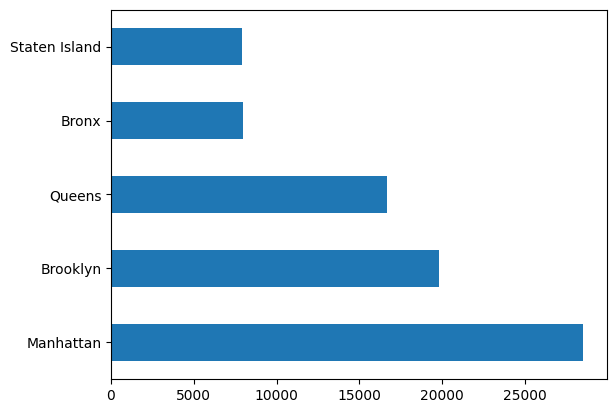

In [265]:
df["borough"].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [297]:
df_pop_boro = pd.read_csv("boro_population.csv")
dog_per_boro = pd.DataFrame(df["borough"].value_counts()).reset_index()

In [292]:
df_pop_boro

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [293]:
df_dog_pop = pd.merge(dog_per_boro, df_pop_boro, left_on="index", right_on='borough', copy=False)
df_dog_pop = df_dog_pop.rename(columns = {'index':'borough', 'borough_x':'dogs'})

In [295]:
df_dog_pop['dogs_per_capita'] = df_dog_pop['dogs']/df_dog_pop['population']

In [296]:
df_dog_pop[df_dog_pop.dogs_per_capita == df_dog_pop.dogs_per_capita.max()]

,borough,dogs,borough_y,population,area_sqmi,dogs_per_capita
0,Manhattan,28536,Manhattan,1644518,23,0.017352


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot: ylabel='borough,Primary Breed'>

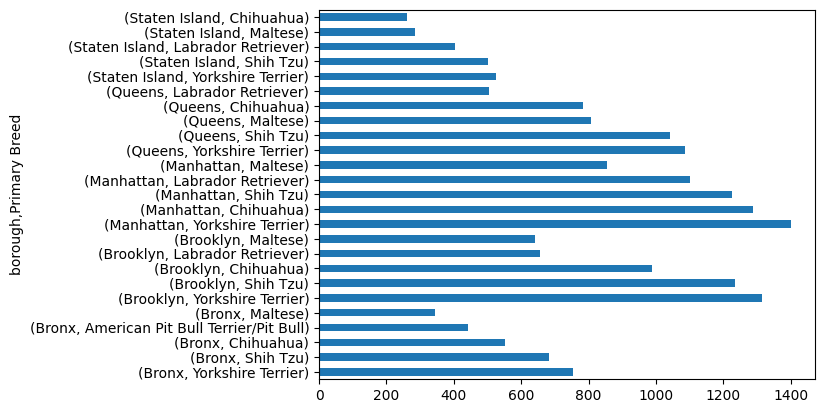

In [337]:
# Made this chart with help from Cynthia.
# I'd be interested in how to make a grouped bar chart, though!

df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0, group_keys=False).head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [323]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64